# A Network Tour of Data Science
EPFL Course EE-558
### &nbsp; &nbsp; &nbsp; Vincent Hardy
### &nbsp; &nbsp; &nbsp; 15/01/2017
## Project: Bike Sharing Demand

In the frame of this study I will use the dataset provided on Kaggle for the challenge entitled ["Cycle Share Dataset"](https://www.kaggle.com/pronto/cycle-share-dataset). The dataset was released by [Pronto](https://www.prontocycleshare.com/) which is the Seattle’s new cycle sharing system with 500 bikes and 58 stations located throughout the city. Data covers every bike trips from 10-13-2014 to 8-31-2016 and is composed of 3 tables:
* station.csv
* trip.csv
* weather.csv

It is worth noticing that Pronto clients are splitted into two kinds of users: eather annual members or short-term pass holders. Short-term pass holders can own two kinds of tickets: eather a 24-hour pass or 3-day pass. One can notice that Pronto is not providing any user ID, hence it will be impossible to drive this analysis in terms of number of users but in terms of number of trips.

Furthermore the final aim of this project is to try to predict accurately the bikes demand at each station of Seattle.

This project will fall mainly into six parts detailed below:

1. **Acquisition of Row Data**
2. **Users Behaviors**
    1. General Time Trends: Daily and Hourly Analysis
        1. _Daily Analysis_
        2. _Hourly Analysis_
    2. Age Distribution
    3. Type of user: Annual Member or Short-Term Pass Holder (24H or 3D pass)
3. **PCA Analysis on daily trends**
    1. Building the data to apply PCA
    2. Applying PCA & Visualization
4. **Bikes Variation Analysis Per Station**
    1. Most popular start & stop stations
    2. Total Variation at the station SLU-01
    3. Daily Variation
        1. _Details for one station: SLU-01_
        2. _Computation of the sampled data for each station_
5. **Regression on the Daily Variation of Bikes**
    1. Building final Dataframe for regression
    2. Numerization of the Dataframe
    3. Regression with one model for all the stations
    4. Regression with one model at each station
    5. Pratical application for Pronto
6. **Conclusion**

**N.B**: The IPython modules attached to this project must be run in the same order as the report.

# 1. Acquisition of Raw Data

Following a classical Data Science scheme, we must first load the raw data and make a bit of data cleaning. We will use during this project the convenient structure of Pandas Dataframes to represent our datasets. One can oberserve below the shapes and some extracts from the raw Dataframes we will use in the following.

[See Code](acquisition_raw_data.ipynb)

In [1]:
%run acquisition_raw_data.ipynb

There are 58 stations.
Station database shape: (58, 8) , the 5 first lines are:


,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
station_id,,,,,,,,
BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN



We have 689 days of weather data.
Weather database shape: (689, 20) , the 5 first lines are:


,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain



There are 236065 trips in total.
Trip database shape: (236065, 14) , the 5 first lines are:


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date,hour
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13,10
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13,10
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13,10
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13,10
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13,10


# 2. Users Behaviors

This part mainly rely on the data exploration step. The idea is to analyze the trips data in order to identify first time patterns and then users behaviors regarding their age or type (annual member or short-term pass holder). 
As said in the introduction, the frequency of use will be quantified by the number of bike trips.

## A. General Time Trends: Daily and Hourly Analysis

### a. _Daily Analysis_

We start by analyzing the daily trends over the whole period we have data. Furthermore we would like to test whether this global daily trips is correlated with some weather data - for instance the mean temperature.

[See Code](daily_time_analysis.ipynb)

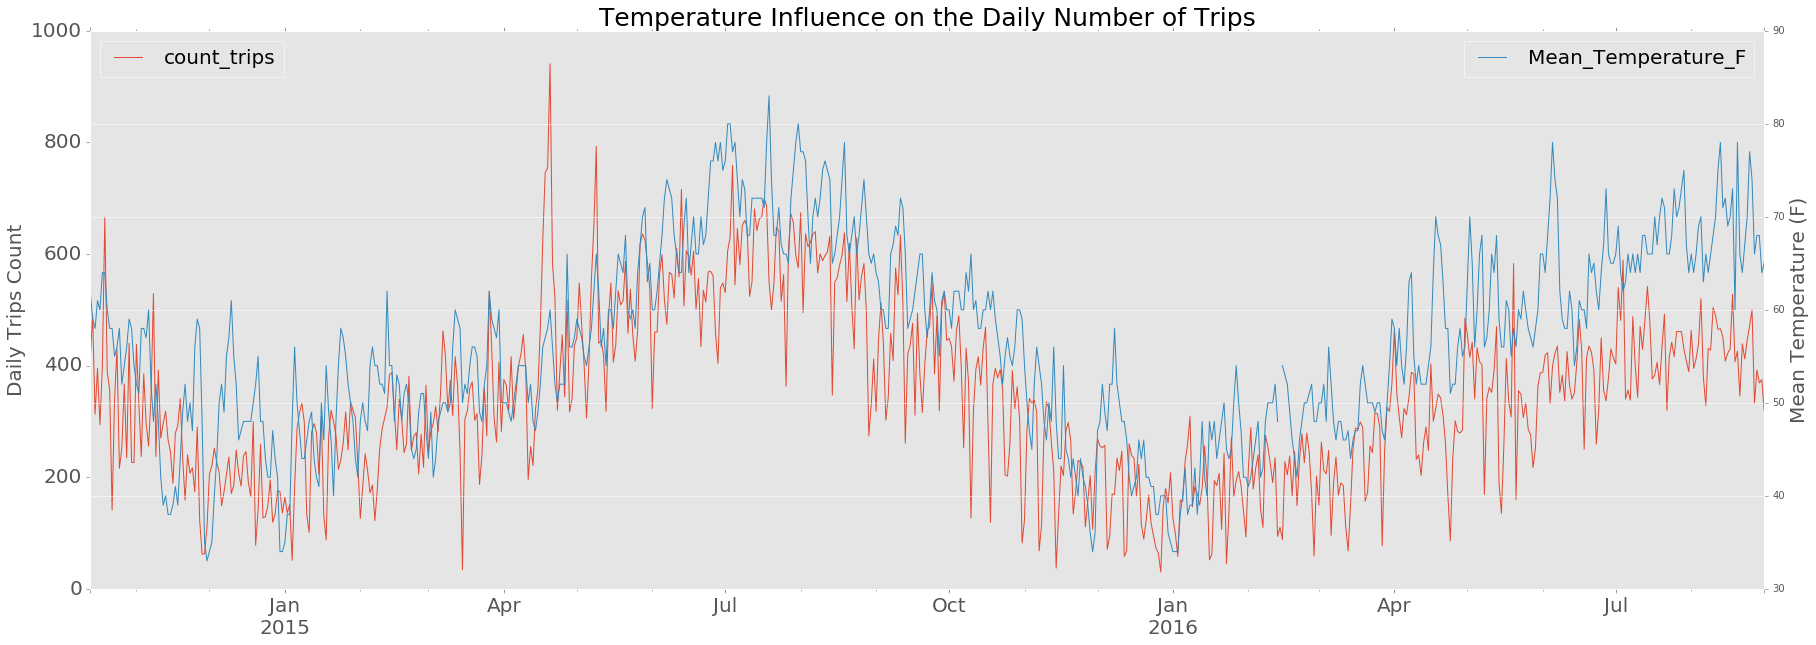

In [2]:
% run daily_time_analysis.ipynb

As expected temperature shape is highly linked to the daily count of trips. Moreover one can notice the seasons influence on the number of trips: more during summer, less during winter.

### b. _Hourly Analysis_

We might expect for the hourly analysis quite different patterns whether this is a week day of weekend day. Let's verify this hint.

[See Code](hourly_time_analysis.ipynb)

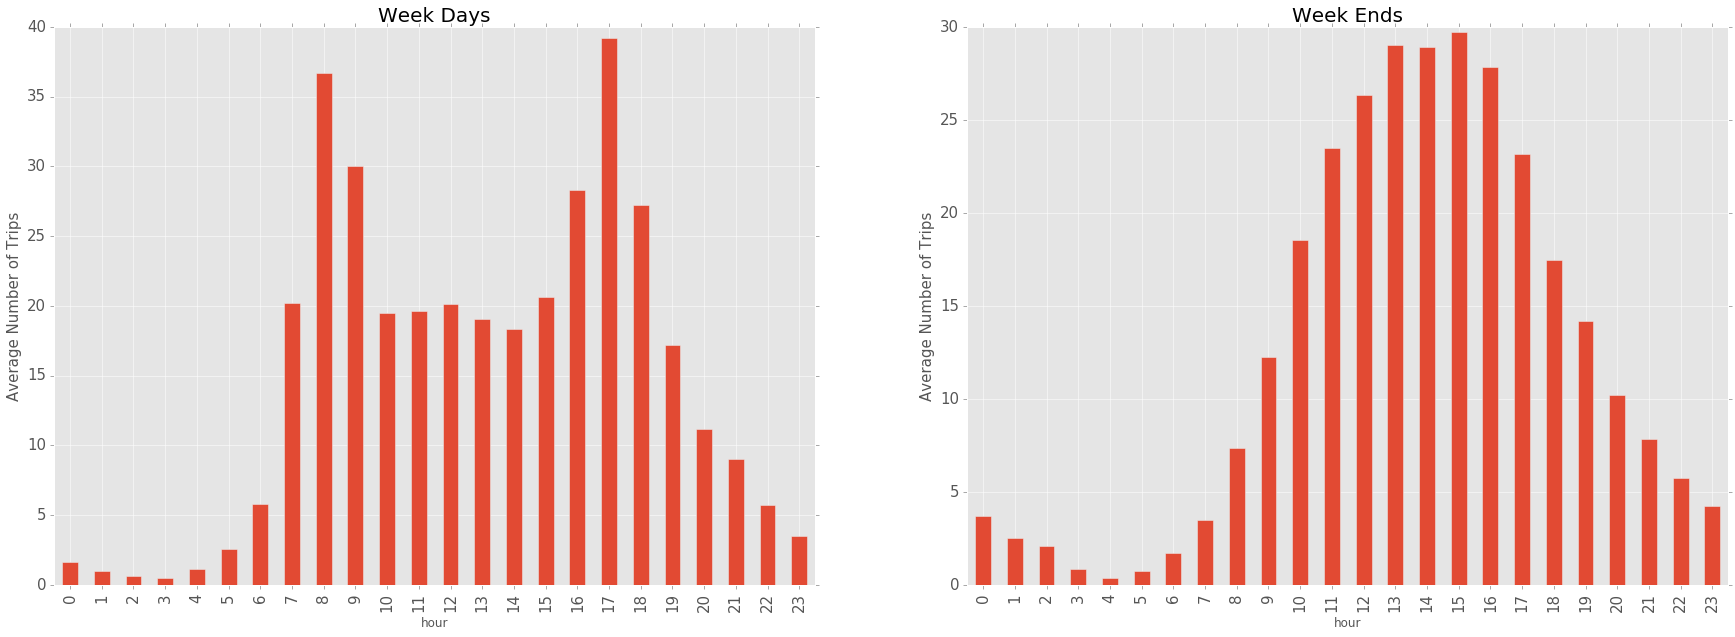

In [3]:
% run hourly_time_analysis.ipynb

Indeed during week days we can clearly observe office hours influence whereas during weekend days the distribution is centered around 14:00 which is the ideal time for a bike ride.

## B. Age Distribution

One can also wonder what is the age distribution of users for all these trips.

[See Code](age_distribution.ipynb)

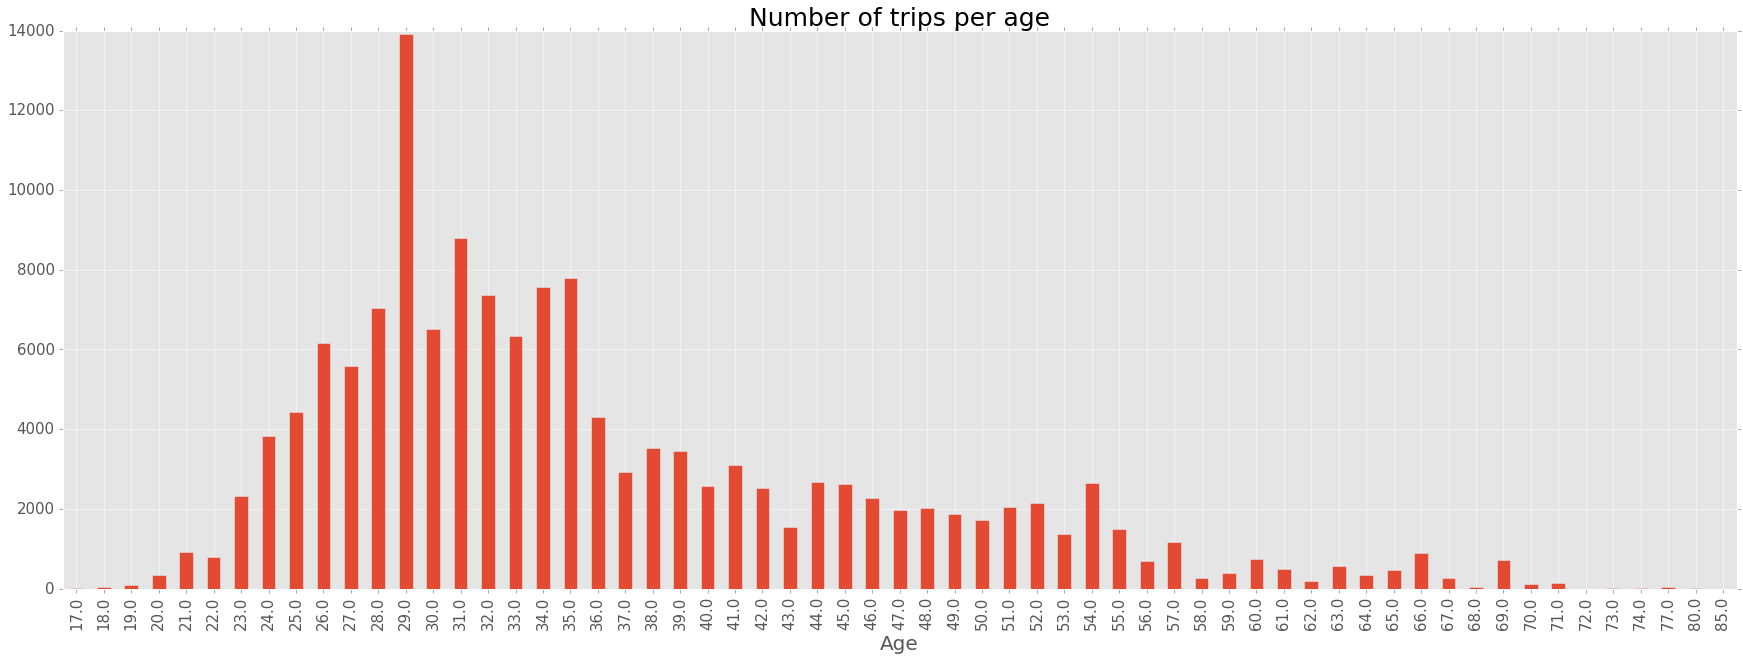

In [4]:
% run age_distribution.ipynb

## C. Type of user: Annual Member or Short-Term Pass Holder (24H or 3D pass)

Finally we would like to know better the difference of behaviors between annual members and short-term pass holders if there is any. Again we should analyze separetely week days and weekend days.

[See Code](type_user.ipynb)

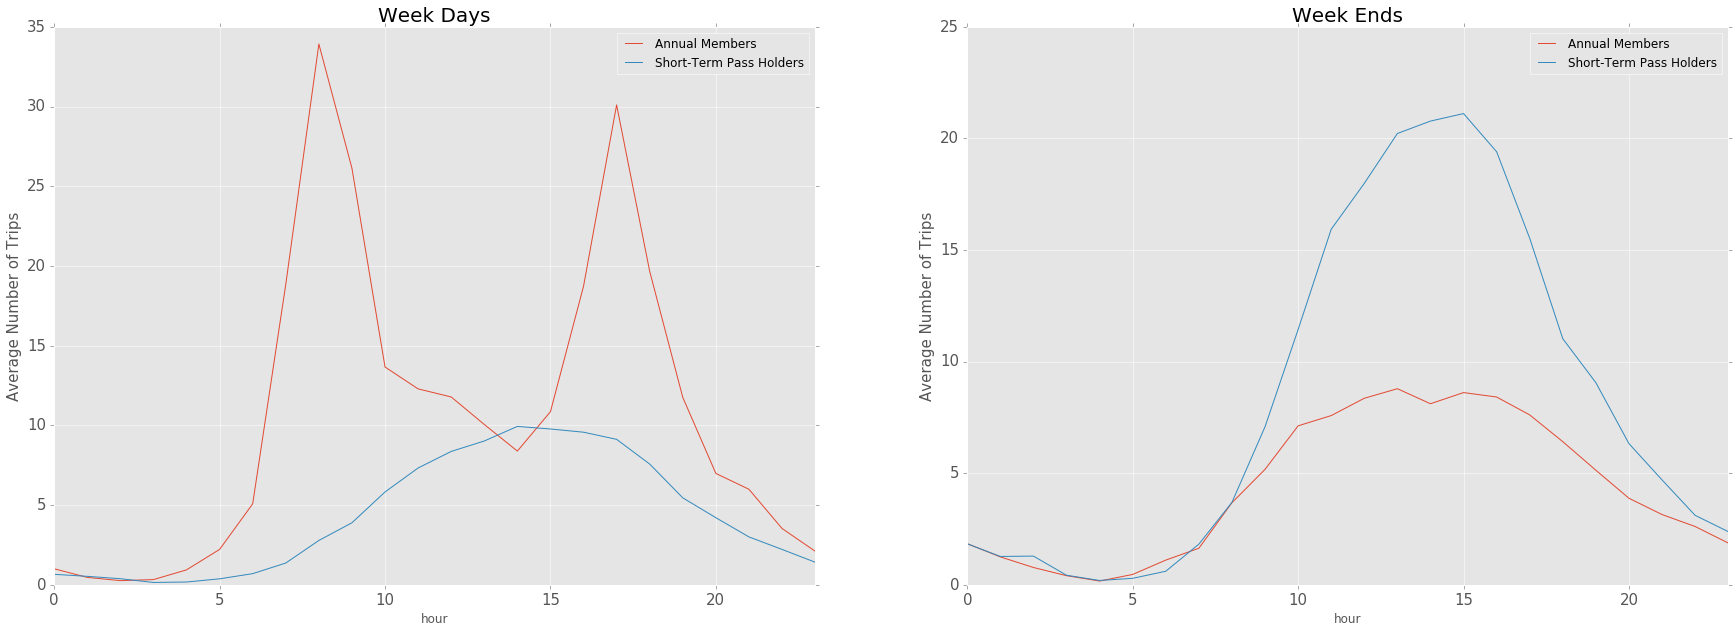

In [5]:
% run type_user.ipynb

As we could have imagined annual members are more likely to use Pronto bikes to go working whereas short-term pass holders are more likely to go cycling occasionally during weekends as a hobby.

# 3. PCA Analysis on daily trends

The first data exploitation tool we would like to use now is a Principal Components Analysis (PCA). Indeed this machine learning algorithm will allow us to reduce the dimensions of our data in order to ease struture recognition.

For performing PCA, we decided to represent our trips data as 1-day data points. To do so we computed the total hourly number of trips every day. The aim will be to identify patterns among this time distribution which could be expalined by either the weather or the day of the week. Indeed both possible explanations are motivated by the data exploration we did before.

To this 24 dimensions (coming from 24 hours a day) we will add the mean temperature. This leaves us with 25 dimensions to be reduced.

## A. Building the data to apply PCA

One can find below an extract from the Dataframe we will use to perform PCA. As said before, we have 689 data points and 25 dimensions which will be reduced to 2 dimensions for further analysis.

The remaining 4 columns (precipitation, day of the week, events, total_trips) will only be used as labels to analyze PCA (supervised learning).

Regarding the column 'Events', numerization is the following:
* 3: Snow
* 2: Rain
* 1: Fog
* 0: empty

[See Code](building_PCA_data.ipynb)

In [6]:
% run building_PCA_data.ipynb

hour,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,Mean_Temperature_F,Precipitation_In,day_of_week,Events,total_trips
date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,10.0,4.0,3.0,62.0,0.00,week,2,406.0
2014-10-14,0.0,0.0,0.0,0.0,0.0,1.0,5.0,22.0,35.0,25.0,...,28.0,17.0,13.0,6.0,2.0,59.0,0.11,week,2,489.0
2014-10-15,3.0,2.0,1.0,0.0,0.0,0.0,7.0,10.0,12.0,21.0,...,21.0,12.0,12.0,8.0,1.0,58.0,0.45,week,2,312.0
2014-10-16,4.0,1.0,0.0,0.0,0.0,2.0,7.0,14.0,35.0,25.0,...,22.0,21.0,8.0,6.0,6.0,61.0,0.00,week,2,389.0
2014-10-17,2.0,1.0,1.0,0.0,0.0,1.0,5.0,16.0,28.0,26.0,...,15.0,10.0,20.0,9.0,2.0,60.0,0.14,week,2,292.0


## B. Applying PCA & Visualization

As announced before, we perform PCA only on the first 25 columns, the remaining 4 columns being used to display labels. Each data points represent a day.

[See Code](applying_PCA.ipynb)

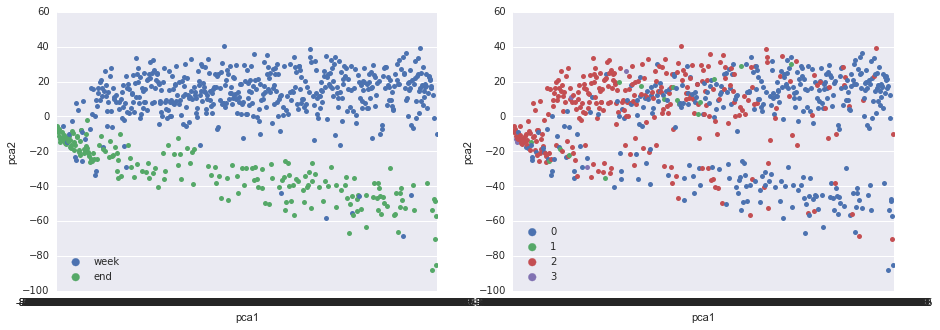

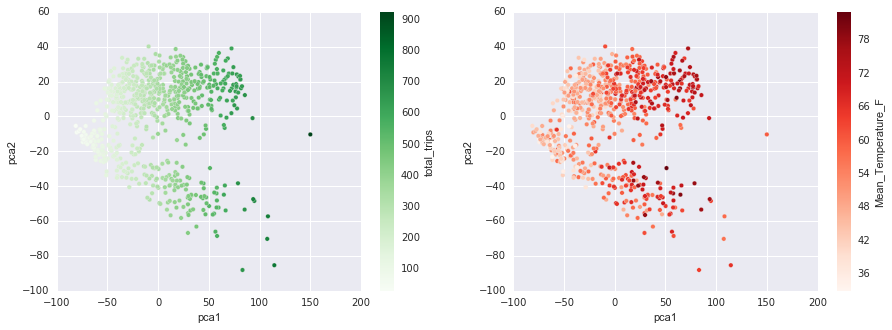

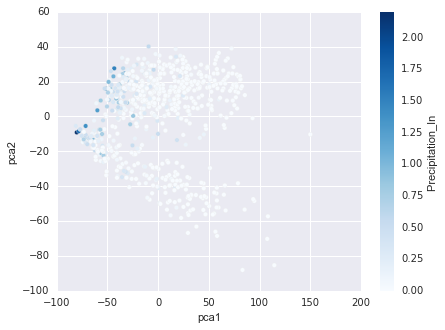

In [7]:
% run applying_PCA.ipynb

Results are highly interesting since PCA almost perfectly distinguish weekends and week days. In other words the two PCA components allow to explain the variance within our dataset in terms of week days/ week ends. This is in compliance with part 2.

Furthermore dry and hot days are more likely to be with higher PCA1 where as wet and cold days are more likely to be with lower PCA1.

Hence one can advocate that PCA2 is related to the week days/ week ends feature whereas PCA1 is related to the total number of trips as well as the temperature.

# 4. Bikes Variation Analysis Per Station

The final aim of this project is be to predict the demand at a given station. Therefore such a purpose would require to know the number of available bikes at each station at a given time. Then we would be able to perform a regression algorithm on this number of available bikes.

Unfortunately this bike availability information at each station is not provided in the dataset. I e-mailed Pronto to know if it was possible to get this information, but they did not answer. Consequently we have now to find a way to compute it.

## A. Most popular start & stop stations

Before performing additional data exploitation, we need first to make some further data exploration on the stations we will work on. Especially we would like to know which stations are more used for starts and stops and in which proportion.

[See Code](station_popularity.ipynb)

,Nber_starts,Nber_stops
station_id,,
8D OPS 02,2,2
BT-01,9392,9202
BT-03,6568,5135
BT-04,3819,3326
BT-05,4986,5031


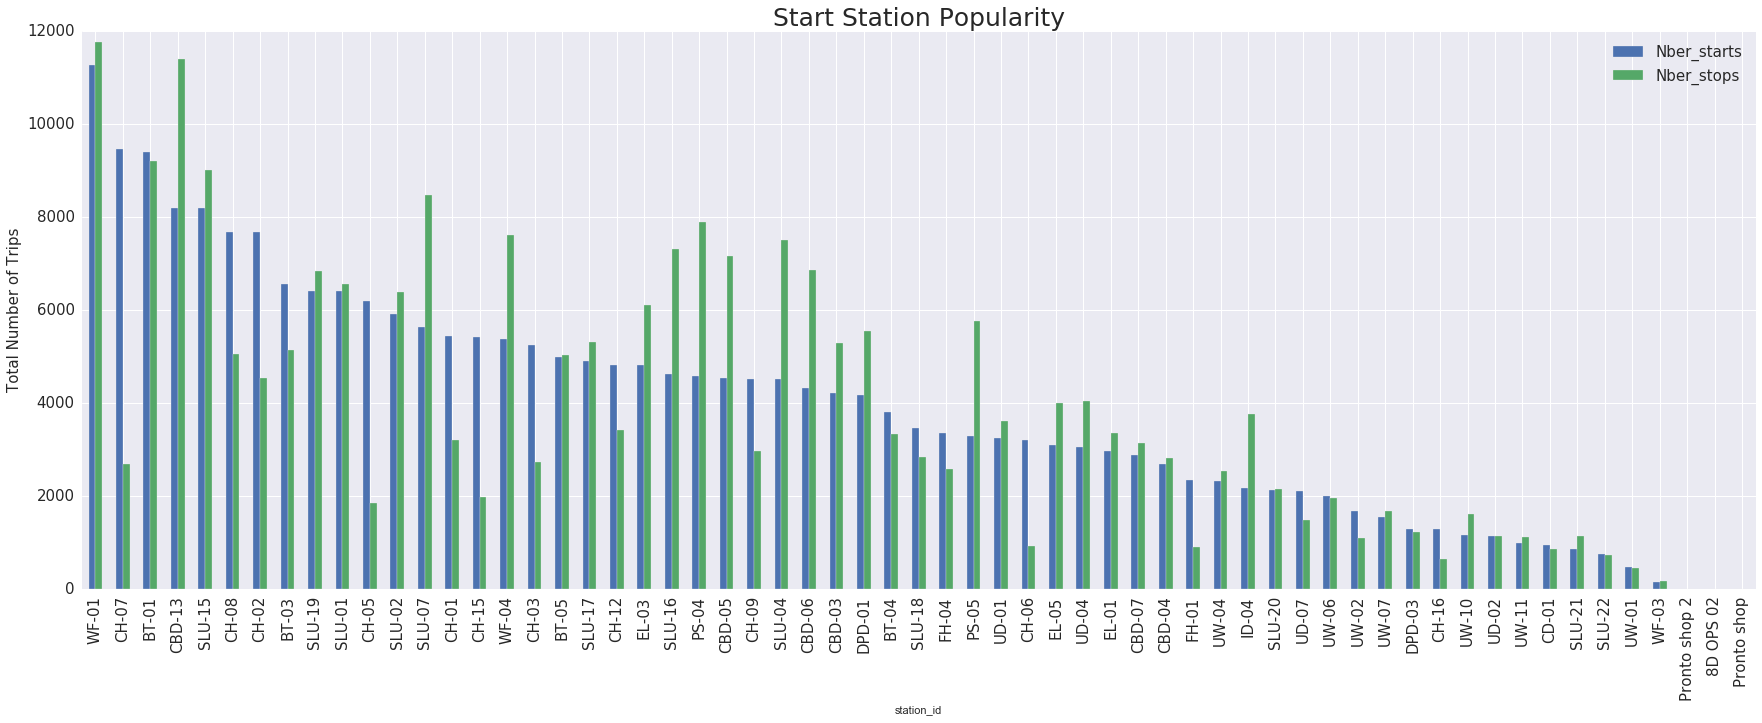

In [8]:
% run station_popularity.ipynb

First of all some stations are definitely more popular than others.

One can analyze that many stations do not reach an equilibrium between the number of starts and the number of stops. This means that Pronto is most certainly re-equilibrating the distribtion of bikes regularly. Obsiously this intervention of Pronto in the bike availability is not quantified in our raw data. Consequently it might be impossible to compute the real number of available bikes at a given station.

However we might try to infer the bike availability at a station which has as many start than stop trips. Indeed with hope, there will be very few interventions of Pronto and the total bike variation will be very close to the bike availability. For this test we chose the station **SLU-01** which has both enough data and almost the same number of starts ans stops.

## B. Total Variation at the station SLU-01
Hence let's compute the total variation at SLU-01 over the entire period of our data to see if we can infer the number of available bikes.

To do so, a new column was added - called 'incrementation' - and valued **(+1) for a stop** and **(-1) for a start**. This column allowed us then to compute the total variation by making the sum as you can observe below.

[See Code](instanteanous_variation_total.ipynb)

The Station SLU-01 has 18 docks in total.


,time,bikeid,destination_id,incrementation,total_variation
trip_id,,,,,
552,2014-10-13 13:09:00,SEA00204,SLU-01,-1.0,-1.0
552,2014-10-13 13:18:00,SEA00204,SLU-01,1.0,0.0
591,2014-10-13 14:03:00,SEA00456,WF-04,-1.0,-1.0
592,2014-10-13 14:05:00,SEA00297,WF-04,-1.0,-2.0
596,2014-10-13 14:06:00,SEA00204,WF-04,-1.0,-3.0


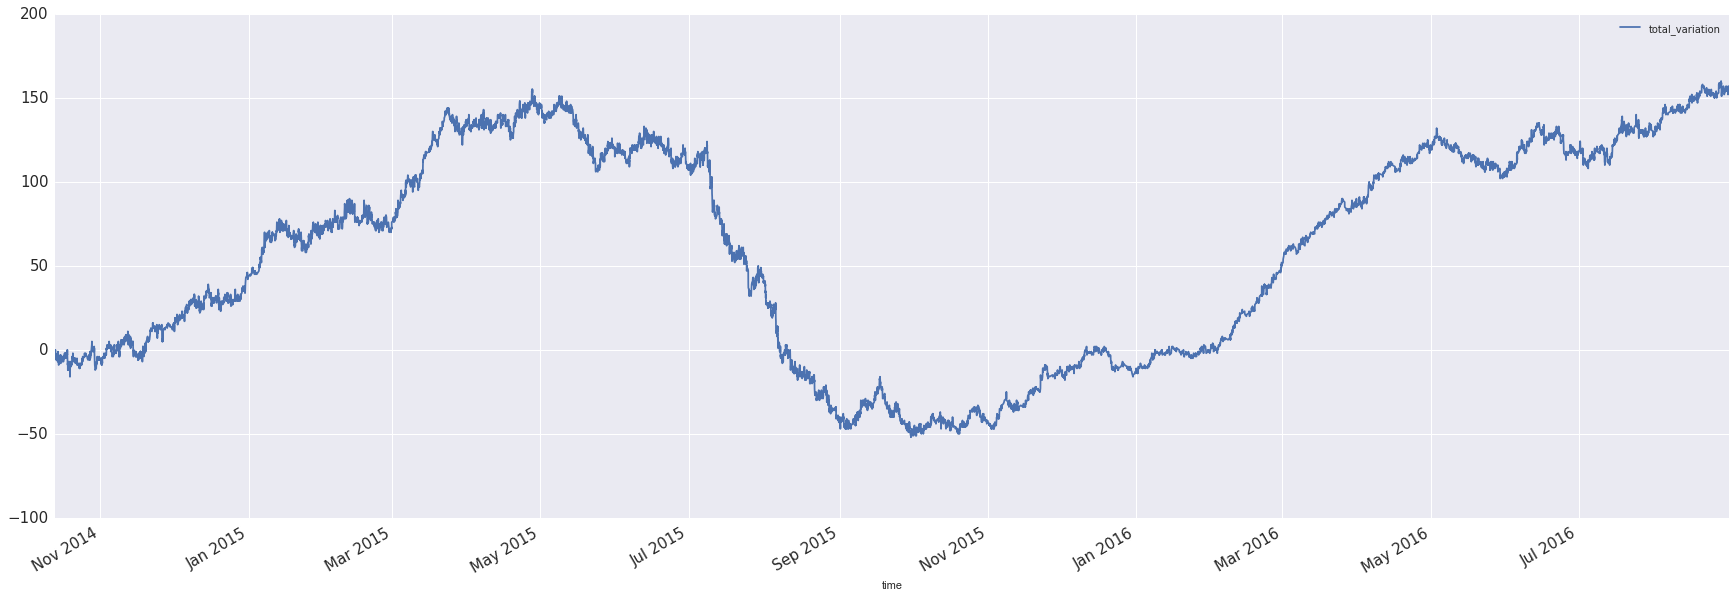

In [9]:
% run instanteanous_variation_total.ipynb

It appears that the total variation of bikes is often greatly superior to the number of docks for SLU-01 (18). Hence we can not directly infer the bike availability. On reflection however the daily bikes variation might be an effective indicator to represent the demand at a station.

## C. Daily Variation

Before computing the daily bikes varition per station at a large scale, let's first detail it on one particular station: SLU-01.

### _a. Details for one station: SLU-01_

To begin with, one should compute the instanteanous daily variation using the same principle as before, instead that this time we reset to 0 each day the column daily_variation as exposed below:

* Instanteanous Variation:

[See Code](instanteanous_variation_daily.ipynb)

,time,bikeid,destination_id,incrementation,total_variation,daily_variation
trip_id,,,,,,
883,2014-10-13 20:31:00,SEA00429,CH-01,-1.0,-5.0,-5.0
898,2014-10-13 21:43:00,SEA00046,SLU-02,-1.0,-6.0,-6.0
911,2014-10-14 06:36:00,SEA00317,CH-12,1.0,-5.0,1.0
930,2014-10-14 07:55:00,SEA00166,CH-15,1.0,-4.0,2.0
934,2014-10-14 07:56:00,SEA00317,ID-04,-1.0,-5.0,1.0
951,2014-10-14 08:19:00,SEA00422,SLU-18,1.0,-4.0,2.0


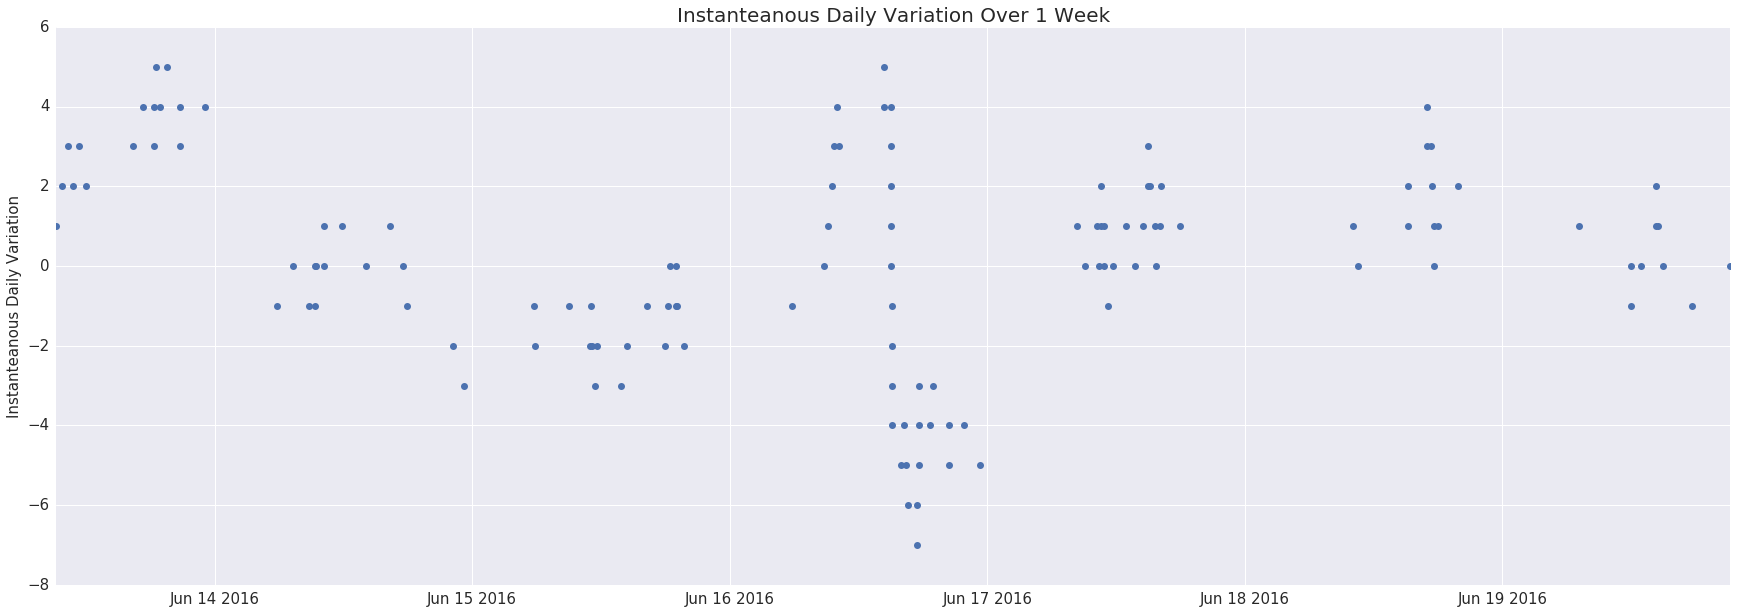

In [10]:
% run instanteanous_variation_daily.ipynb

* Sampled Variation:

To perform an efficient regession on the daily variation of bikes, we need to resample on a regular time basis. Indeed we must exploit the information that between each data points above the variation is constant! Consequently let's sample our dataset every 15 mins as you can notice below:

[See Code](sampled_variation.ipynb)

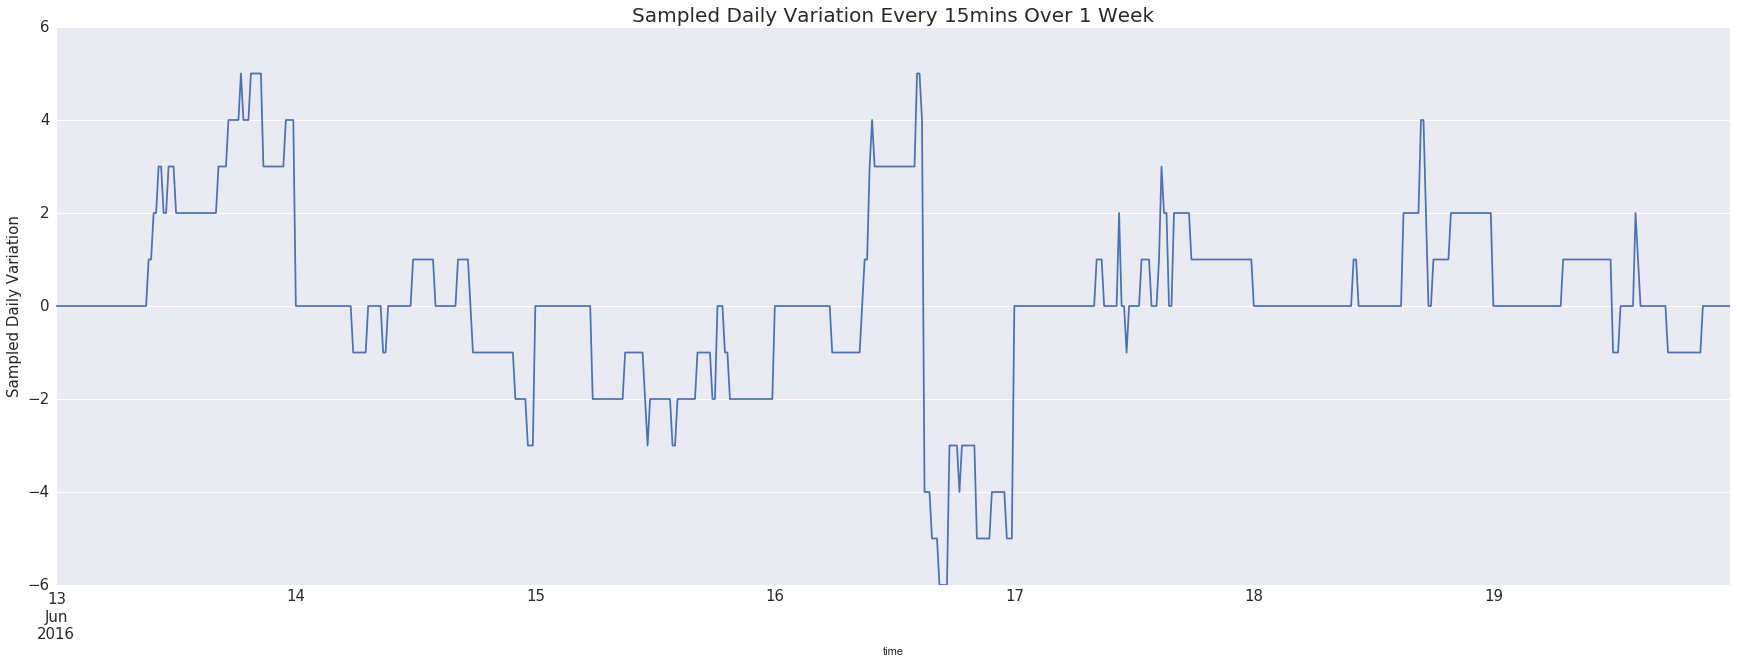

In [11]:
% run sampled_variation.ipynb

### _b. Computation of the sampled data for each station_

Now that we know how to compute the sampled daily variation for one station, let's compute a single DataFrame gathering the variations for all stations.

For computational matters, we reduced the number of data by keeping datapoints verifying the following criteria:
* only stations which opened 2014-10-13 and had trips until 2016-8-31
* trips from 2014-10-14 to 2016-3-17

Even with these reductions, the script below is extremly time consuming (about 30 mins), which is why we provide you below with the resulting matrix used for regression. This matrix 'Xtot_to_keep_all' can be loaded below so that you do not need to run the 3 next IPython scripts (especially the next one).

[See Code](create_sampled_data_each_station.ipynb)

In [98]:
#ATTENTION: The script below takes about 30 mins to be run on my computer
#You can directly load the matrix later in the report if wanted (default)
%run create_sampled_data_each_station.ipynb
print('Sampled Variation database shape: {}'.format(sampled_variation.shape))

Sampled Variation database shape: (2246400, 2)


# 5. Regression on the Daily Variation of Bikes

As we managed to quantify the demand at each station, we can tackle a new data exploitation step. Indeed our goal is to perform a regression on the daily variation of bikes. In other words knowing a dataset **X**, we would like to predict the daily variation **y** such that **f(X) = y**.

This regression problem will cover the following steps:

* choice of features to build our dataset X
* how to represent these features (numerization)?
* splitting our entire dataset between training and testing set
* choice of the regressor model
* choice of the regressor hyperparameters
* evaluation of the regression, which metric to use?

Regressions will be run using the Scikit Learn package.

## A. Building final Dataframe for regression

As we have already computed the daily variation **y**, only the choice of features to be added to the DataFrame remains. The features which are most likely to explain the daily variation are listed below:
* weather information:
    * events indicator (nothing , fog, rain or snow)
    * mean Temperature
    * precipitation
* time information:
    * month
    * day of week
    * hour

One can observe below the final structure of the DataFrame we will use for the regression:

[See Code](building_final_dataframe_regression.ipynb)

In [101]:
% run building_final_dataframe_regression.ipynb

,Events,Mean_Temperature_F,Precipitation_In,daily_variation,station_id,month,weekday,hour
2014-10-14 00:00:00,Rain,59.0,0.11,0.0,SLU-07,10,1,0.00
2014-10-14 00:15:00,Rain,59.0,0.11,0.0,SLU-07,10,1,0.25
2014-10-14 00:30:00,Rain,59.0,0.11,0.0,SLU-07,10,1,0.50
2014-10-14 00:45:00,Rain,59.0,0.11,0.0,SLU-07,10,1,0.75
2014-10-14 01:00:00,Rain,59.0,0.11,0.0,SLU-07,10,1,1.00


## B. Numerization of the Dataframe

Now how to represent these features?

The 'station_id' is simply mapped to an int dictionary.
Regarding the column 'Events', numerization is the following:
* 3: Snow
* 2: Rain
* 1: Fog
* 0: nothing

[See Code](numerization_final_dataframe.ipynb)

In [100]:
% run numerization_final_dataframe.ipynb

Database shape used for regression: (2242080, 7)


## C. Regression with one model for all the stations

We tried first to perform directly a regression on the entire dataset with the 45 stations coming from the numerization.

Moreover we decided to split our dataset equally between training and testing set in order to observe accurate enough predictions.

For the regression evaluation we will use two metrics:
* Mean Squared Error (mse): classical metric used for regressions
* Mean Absolute Error (mae): since we try to predict the daily variation which is an integer, the absolute error represents directly how far is the prediction from the truth (of how many units)

Many different regressor models were tested - with default hyperparameters - such as [we represent **(mse,mae)**]:
* linear regression **(10.73 , 1.90)**
* Ridge regression **(10.72 , 1.89)**
* SGD regression **(15.36 , 2.74)**
* Bayesian Ridge **(10.75 , 1.90)**
* Logistic regression (no results: too much time of computation)
* random forest regression **(0.51 , 0.30)**

It appeared that the **random forest (RF) regressor** outperformed by far the other regressors. Hence we decided to use only the random forest (RF) regressor in the following.

One can wonder now the optimal number of trees to use in the regression.

In [12]:
#Load data (ONLY If you don't want to run the last 3 scripts)
Xtot = np.load('Xtot_to_keep_all.npy')
ytot = np.load('ytot_to_keep_all.npy')
int_to_station = np.load('int_to_station_all.npy')
int_to_station = int_to_station[()]

[See Code](regression_onemodel_all.ipynb)

Split: 1121040 testing and 1121040 training samples


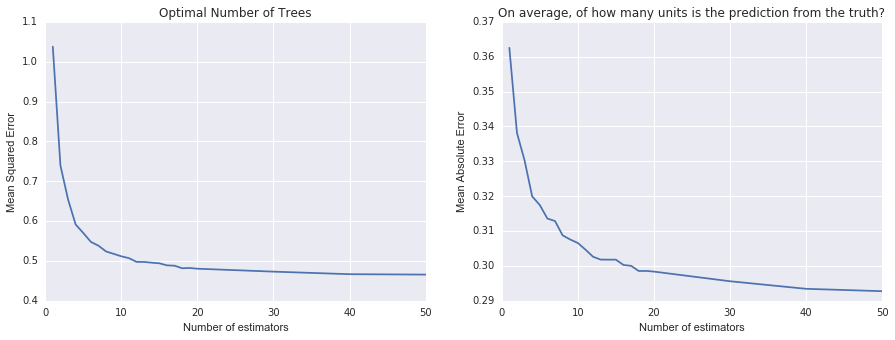

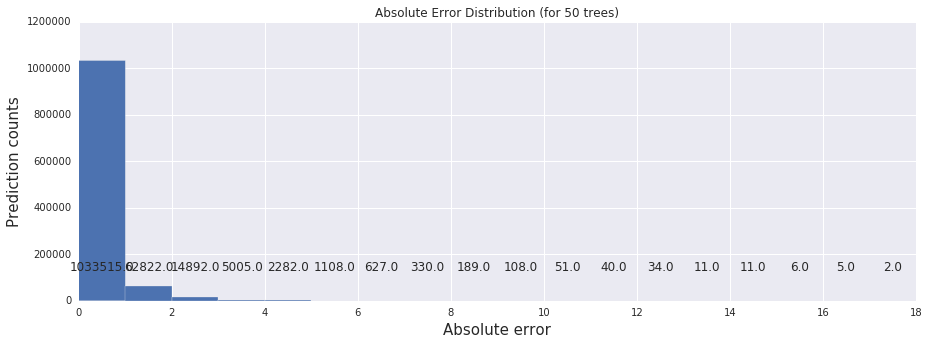

In [13]:
#Finding the optimal number of trees (!takes a lot of time!)
% run regression_onemodel_all.ipynb

As a result, one can notice that the higher the number of regressors the more precise is the RF regression.
Moreover it seems that a vast majority of predictions were at less than one unit from the truth which is extremely encouraging !

We will consider in the following that **20 trees** is precise enough to perform RF regression on our dataset.

## D. Regression with one model at each station

As seen before, stations have very different singularities, therefore it might be interesting to assign one regression model (with 20 Trees) at each station.

[See Code](regression_onemodel_each.ipynb)

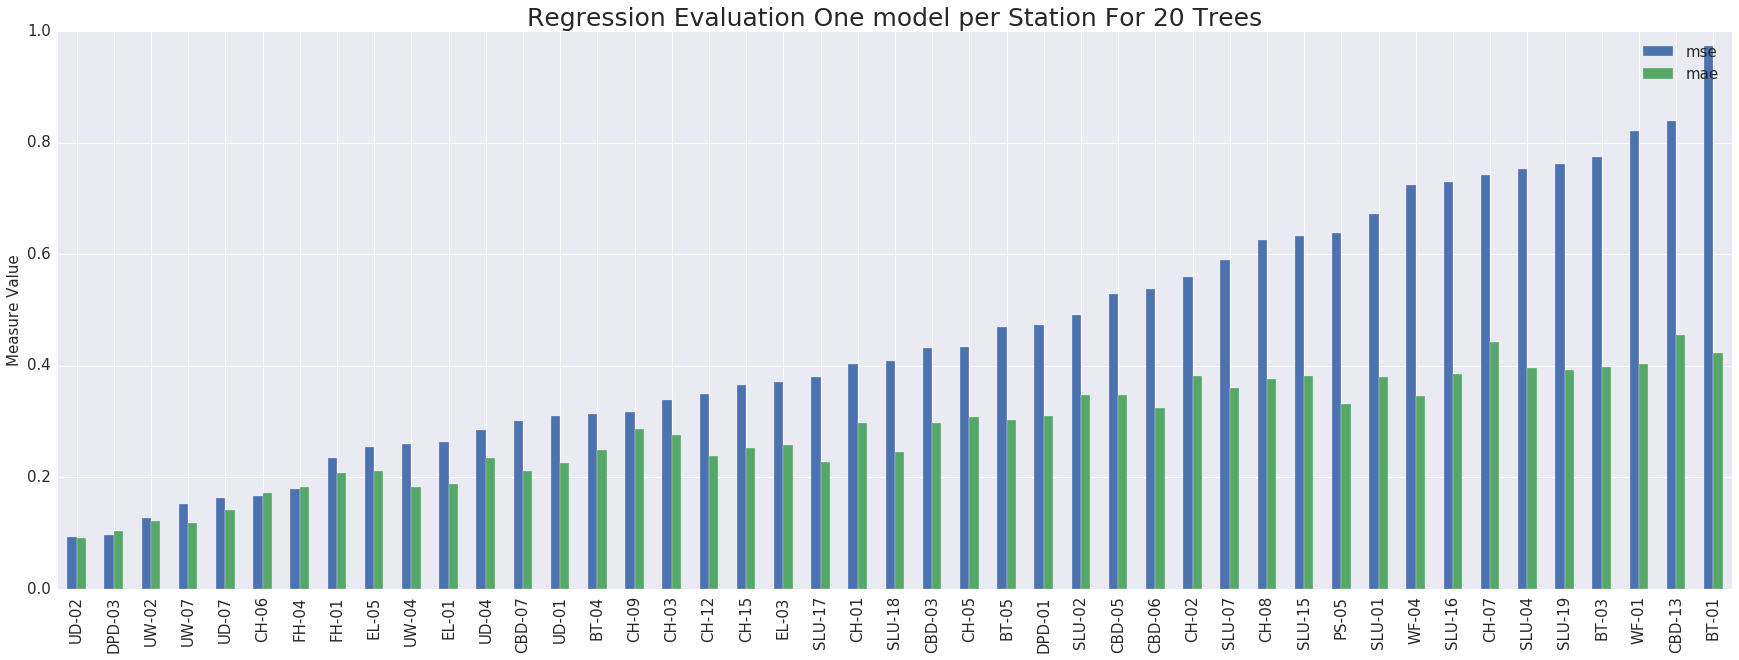

In [20]:
% run regression_onemodel_each.ipynb

Comparing **MSE values** on the graph above with the value of **0.51** found earlier in the case of only one model, it appears that one model per station provides for a great majority of stations more precise regressions (since lower MSE).

## E. Pratical application for Pronto

Finally what if Pronto wanted to use this prediction tool, how would the prediction look like?

In this section you can vary both station and week to visualize.

* Select Station you want to study:

In [15]:
station_id='SLU-01'

* Recompute the final Dataframe to use for regression (ONLY for station selected & from 10-14-2014 to 30-8-2016):

[See Code](numerization_final_dataframe_1station.ipynb)

In [16]:
% run numerization_final_dataframe_1station.ipynb

The Station SLU-01 has 18 docks in total.


,Events,Mean_Temperature_F,Precipitation_In,daily_variation,month,weekday,hour
time,,,,,,,
2014-10-14 00:00:00,2,59.0,0.11,0.0,10,1,0.00
2014-10-14 00:15:00,2,59.0,0.11,0.0,10,1,0.25
2014-10-14 00:30:00,2,59.0,0.11,0.0,10,1,0.50
2014-10-14 00:45:00,2,59.0,0.11,0.0,10,1,0.75
2014-10-14 01:00:00,2,59.0,0.11,0.0,10,1,1.00


DataFrame shape used for regression: (65856, 7)


* Choose the week for which Pronto would like to have a prediction:

In [17]:
date_start = date(2016,6,6) # number 0 of the week (Monday)
date_end = date(2016,6,12)
week = [date_start + timedelta(days=x) for x in range((date_end-date_start).days + 1)]

* RF Regression performed with 20 trees to the station selected (**partially** trained during the week selected):

[See Code](regression_1station_partially.ipynb)

Split: 32928 testing and 32928 training samples
mse: 0.2346
mae: 0.2422


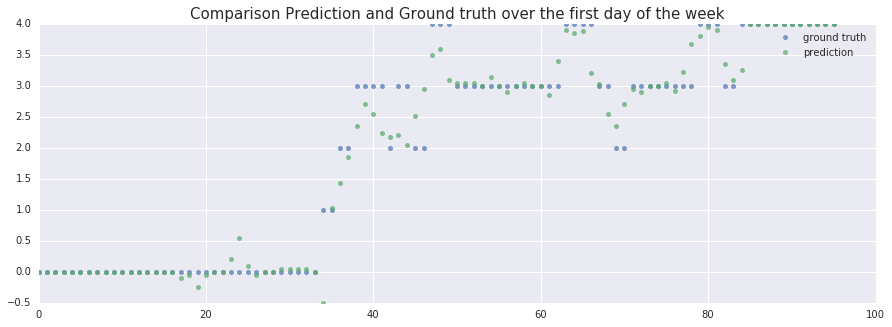

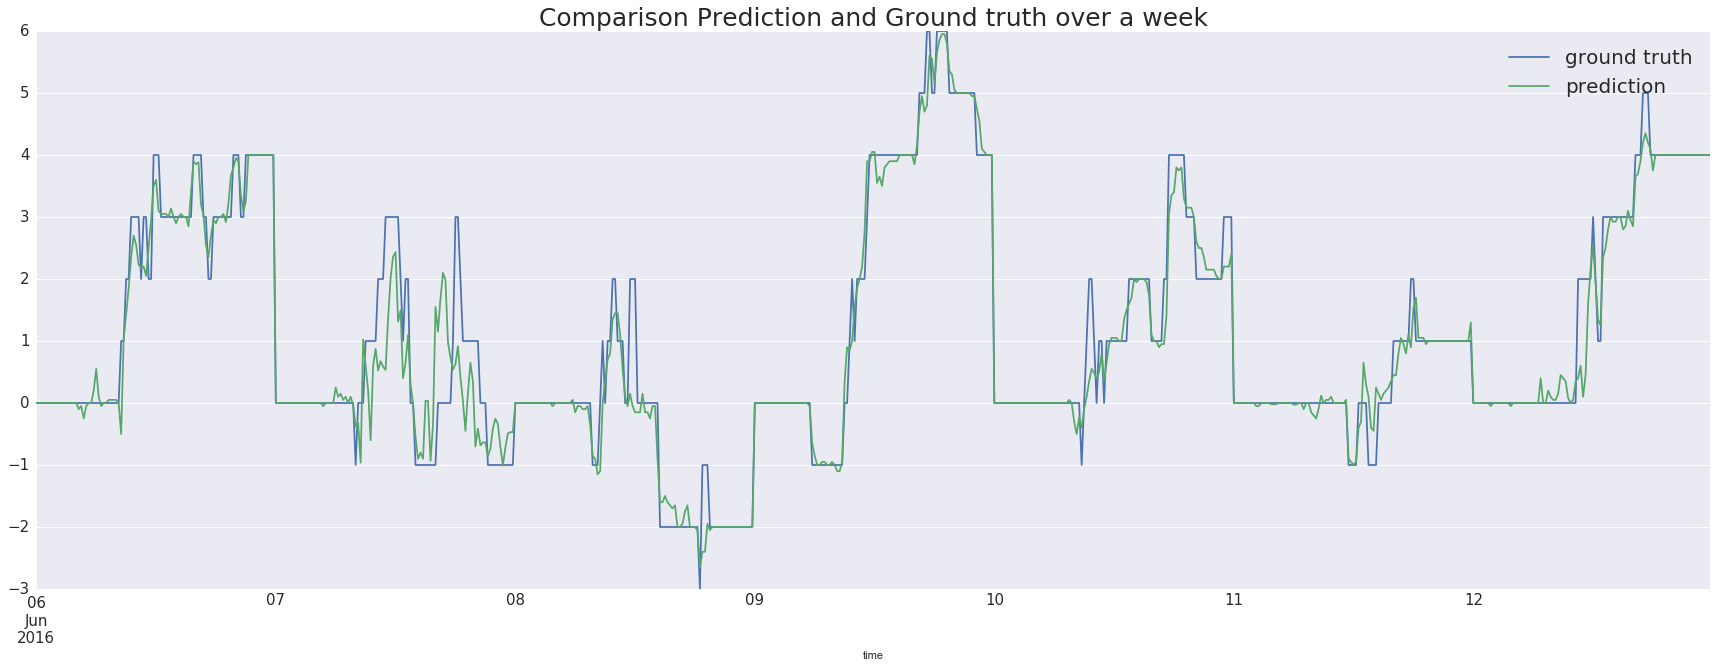

In [18]:
% run regression_1station_partially.ipynb

* RF Regression performed with 20 trees to the station selected (**not** trained during the week selected):

[See Code](regression_1station_not.ipynb)

Split: 32592 testing and 32592 training samples
mse: 6.1937
mae: 1.5991


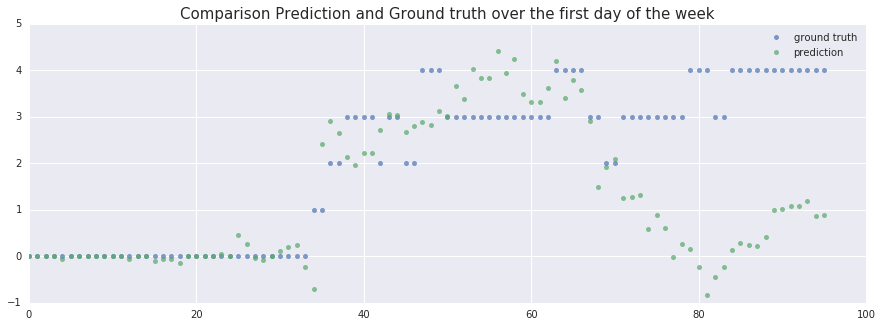

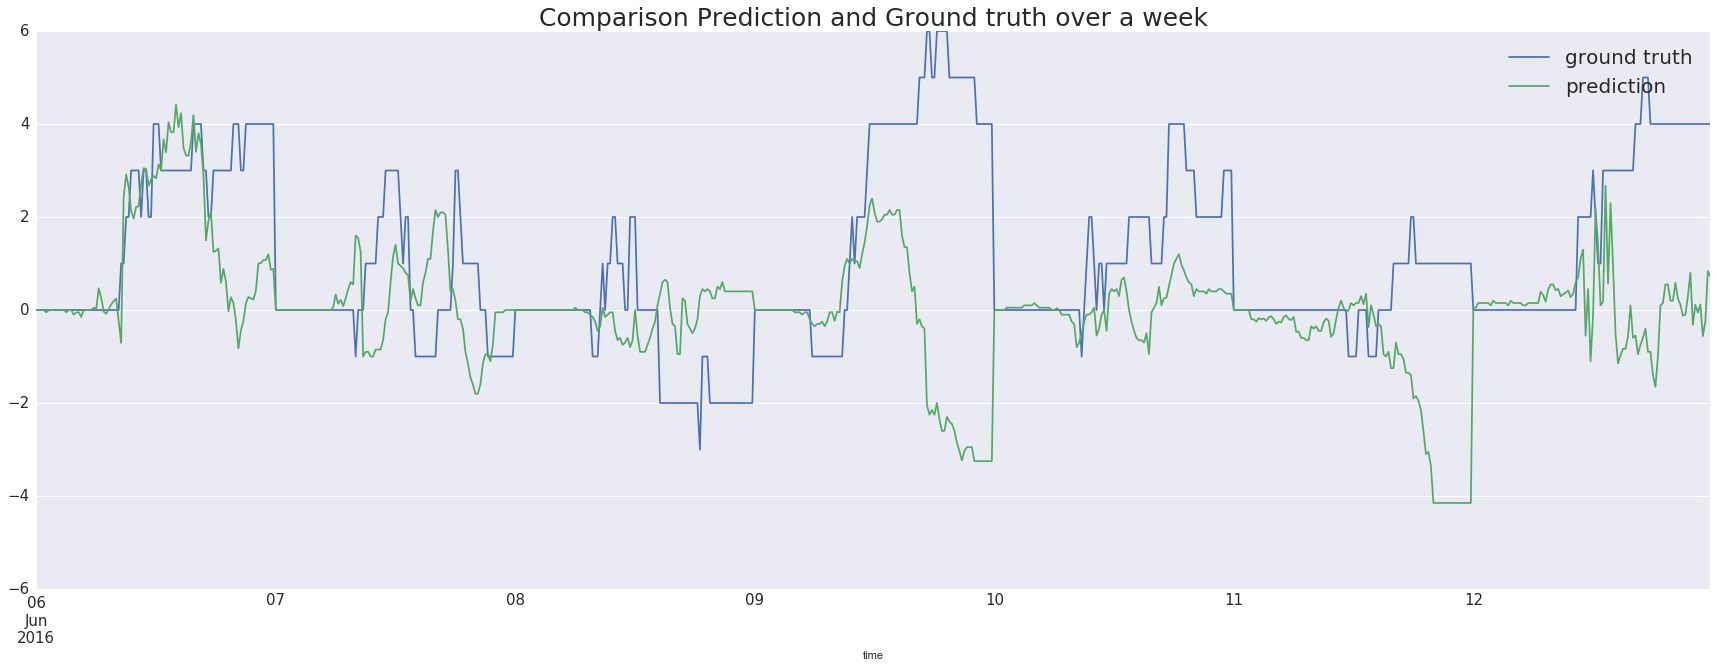

In [19]:
% run regression_1station_not.ipynb

To conclude results look promising when we consider the model whose training set is composed of some datapoints from the week we want predictions. However performances worsen considerably when there is no datapoint of the week under study in the training set.

Nevertheless the predictions for Monday (6th of June) in the second regression seem almost acceptable. In fact one can notice a decline of precision along the week.

# 6. Conclusion

This project on the cycle share system provided by Pronto allowed us  to experiment the entire data science process.

From the data acquisition of the Kaggle dataset and its cleaning, we moved on to the exploration of the users behaviors in terms of time trends, age and type of users.

Then a PCA analysis allowed us to identify clearly the correlation between the number of trips and weather features. This data exploitation refound also some patterns already identified in the exploration such as the distinction between week day and weekend.

Despite the high number of data, we managed also to compute the daily bikes variation for almost all the stations. once the ground truth of daily variation computed, we were able to perform many different regressions on it to fit best our data. The random forest regressor was by far the most precise found. Moreover we tested different fitting strategies: eather one for all stations or one per station. Finally regression results for the optimal number of trees were highly encouraging.